In [4]:
import pandas as pd

# Define the file path
file_path = "C:\\Users\\katta\\Downloads\\fraud_detection_dataset_LLM.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows and information about the DataFrame
print(df.head())
print(df.info())

  transaction_id customer_id kyc_verified  account_age_days  \
0     TXN_200000    CUST_799          Yes              1050   
1     TXN_200001    CUST_484          Yes               295   
2     TXN_200002    CUST_791          Yes              2083   
3     TXN_200003    CUST_664          Yes              2789   
4     TXN_200004    CUST_157          Yes               694   

   transaction_amount channel         timestamp  is_fraud  
0              256369  Mobile  12-08-2025 02:10         0  
1                6581  Mobile  25-08-2025 01:14         0  
2                4492  Mobile  17-08-2025 12:12         0  
3              275413     POS  07-08-2025 06:23         0  
4               98098     POS  20-08-2025 21:55         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   transaction_id      5000 non-null   object
 1   custom

In [5]:
import pandas as pd
import numpy as np

# Load the dataset from the specified path
# Replace "your_file_path.csv" with the actual path to your file
try:
    df = pd.read_csv("C:\\Users\\katta\\Downloads\\fraud_detection_dataset_LLM.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file was not found. Please check the file path.")
    # Exit the script or handle the error as needed
    exit()

# --- Find Missing Values ---

# 1. Check for missing values in the entire DataFrame and get a count per column
print("\n--- Missing Values Count per Column ---")
missing_values_count = df.isnull().sum()
print(missing_values_count)

# 2. Check the percentage of missing values per column
print("\n--- Missing Values Percentage per Column ---")
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_values_percentage)

# 3. Check for any missing values in the entire DataFrame (returns True if any exist)
print("\n--- Any Missing Values in DataFrame? ---")
print(df.isnull().values.any())

# 4. Count the total number of missing values in the entire DataFrame
print("\n--- Total Missing Values in DataFrame ---")
total_missing_values = df.isnull().sum().sum()
print(total_missing_values)



# Check for the number of missing values in each column
print("Missing values before handling:")
print(df.isnull().sum())

# Fill missing values in 'kyc_verified' with 'No'
df['kyc_verified'].fillna('No', inplace=True)

# Remove rows where 'transaction_amount' is missing
df.dropna(subset=['transaction_amount'], inplace=True)

# Verify that missing values have been handled
print("\nMissing values after handling:")
print(df.isnull().sum())

Dataset loaded successfully.

--- Missing Values Count per Column ---
transaction_id        0
customer_id           0
kyc_verified          0
account_age_days      0
transaction_amount    0
channel               0
timestamp             0
is_fraud              0
dtype: int64

--- Missing Values Percentage per Column ---
transaction_id        0.0
customer_id           0.0
kyc_verified          0.0
account_age_days      0.0
transaction_amount    0.0
channel               0.0
timestamp             0.0
is_fraud              0.0
dtype: float64

--- Any Missing Values in DataFrame? ---
False

--- Total Missing Values in DataFrame ---
0
Missing values before handling:
transaction_id        0
customer_id           0
kyc_verified          0
account_age_days      0
transaction_amount    0
channel               0
timestamp             0
is_fraud              0
dtype: int64

Missing values after handling:
transaction_id        0
customer_id           0
kyc_verified          0
account_age_days      

C:\Users\katta\AppData\Local\Temp\ipykernel_21860\3702285225.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['kyc_verified'].fillna('No', inplace=True)


In [6]:
# Check for the total number of duplicate transactions
print("Number of duplicate transactions:", df.duplicated(subset=['transaction_id']).sum())

Number of duplicate transactions: 0


In [7]:
# Remove duplicate rows based on the 'transaction_id'
df.drop_duplicates(subset=['transaction_id'], inplace=True)

# Verify that the duplicates have been removed
print("Number of duplicate transactions after removal:", df.duplicated(subset=['transaction_id']).sum())

Number of duplicate transactions after removal: 0


In [9]:
# Convert 'timestamp' into datetime format with day-first parsing
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True, errors='coerce')

# Check if any timestamps failed to convert (NaT) and report
num_invalid_timestamps = df['timestamp'].isna().sum()
if num_invalid_timestamps > 0:
    print(f"Warning: {num_invalid_timestamps} invalid timestamps detected and converted to NaT.")

# Normalize categorical values in the 'channel' column (capitalize first letter of each word)
df['channel'] = df['channel'].str.title()

# Ensure 'transaction_amount' column is numeric; coerce errors to NaN
df['transaction_amount'] = pd.to_numeric(df['transaction_amount'], errors='coerce')

# Optional: Report any non-numeric values coerced to NaN in 'transaction_amount'
num_invalid_amounts = df['transaction_amount'].isna().sum()
if num_invalid_amounts > 0:
    print(f"Warning: {num_invalid_amounts} invalid transaction amounts detected and converted to NaN.")

# Display updated DataFrame info and sample
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      5000 non-null   object        
 1   customer_id         5000 non-null   object        
 2   kyc_verified        5000 non-null   object        
 3   account_age_days    5000 non-null   int64         
 4   transaction_amount  5000 non-null   int64         
 5   channel             5000 non-null   object        
 6   timestamp           5000 non-null   datetime64[ns]
 7   is_fraud            5000 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 312.6+ KB
None
  transaction_id customer_id kyc_verified  account_age_days  \
0     TXN_200000    CUST_799          Yes              1050   
1     TXN_200001    CUST_484          Yes               295   
2     TXN_200002    CUST_791          Yes              2083   
3     

In [10]:
import pandas as pd
import numpy as np

# --- Original Feature Engineering from Project Plan ---

# 1. Features from 'timestamp'
# Convert timestamp to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.weekday
df['month'] = df['timestamp'].dt.month

# 2. High-value transaction feature
df['is_high_value'] = (df['transaction_amount'] > 50000).astype(int)

# -------------------------------------------------------------------

# --- New, Advanced Feature Engineering ---

# 3. Time-based features
# Calculate the time since the last transaction for each customer in seconds
df = df.sort_values(by=['customer_id', 'timestamp'])
df['time_since_last_txn'] = df.groupby('customer_id')['timestamp'].diff().dt.total_seconds().fillna(0)

# 4. Behavioral features
# Calculate rolling average of transaction amount for each customer
df['rolling_avg_txn_amount'] = df.groupby('customer_id')['transaction_amount'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Calculate the deviation of the current transaction from the rolling average
df['txn_deviation_from_avg'] = np.abs(df['transaction_amount'] - df['rolling_avg_txn_amount'])

# 5. Customer usage features
# Count the number of transactions per customer
df['customer_transaction_count'] = df.groupby('customer_id')['transaction_id'].transform('count')

# Count the number of unique channels used by each customer
df['unique_channels_used'] = df.groupby('customer_id')['channel'].transform('nunique')

# Display the new and existing features to verify
print(df.head())
print(df.info())

     transaction_id customer_id kyc_verified  account_age_days  \
1463     TXN_201463    CUST_100          Yes              2507   
4900     TXN_204900    CUST_100          Yes               335   
891      TXN_200891    CUST_100          Yes              2811   
61       TXN_200061    CUST_100          Yes                93   
3017     TXN_203017    CUST_101           No              1469   

      transaction_amount channel           timestamp  is_fraud  hour  weekday  \
1463               17881  Mobile 2025-08-03 05:06:00         0     5        6   
4900                9592     Web 2025-08-07 03:30:00         0     3        3   
891                12251  Mobile 2025-08-16 05:51:00         0     5        5   
61                199623     Web 2025-08-17 05:17:00         0     5        6   
3017               14839     Web 2025-08-03 07:20:00         1     7        6   

      month  is_high_value  time_since_last_txn  rolling_avg_txn_amount  \
1463      8              0               

In [11]:
from sklearn.preprocessing import StandardScaler

# Define the numerical features to scale
num_features = [
    'account_age_days', 'transaction_amount', 'hour', 'weekday', 'month',
    'time_since_last_txn', 'rolling_avg_txn_amount', 'txn_deviation_from_avg',
    'customer_transaction_count', 'unique_channels_used'
]

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the numerical features and transform them
df[num_features] = scaler.fit_transform(df[num_features])

# Verify scaling by showing mean and std dev of scaled columns (should be ~0 and 1)
print(df[num_features].agg(['mean', 'std']))


      account_age_days  transaction_amount          hour       weekday  month  \
mean     -9.023893e-17       -3.907985e-17 -5.684342e-17 -7.389644e-17    0.0   
std       1.000100e+00        1.000100e+00  1.000100e+00  1.000100e+00    0.0   

      time_since_last_txn  rolling_avg_txn_amount  txn_deviation_from_avg  \
mean        -9.947598e-18            1.534772e-16           -7.815970e-18   
std          1.000100e+00            1.000100e+00            1.000100e+00   

      customer_transaction_count  unique_channels_used  
mean               -7.105427e-17          1.165290e-16  
std                 1.000100e+00          1.000100e+00  


In [13]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns to encode
cat_features = ['kyc_verified', 'channel']

# Initialize OneHotEncoder with new parameter name and handle unknown categories gracefully
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_arrays = encoder.fit_transform(df[cat_features])

# Create a DataFrame with encoded feature names
encoded_df = pd.DataFrame(
    encoded_arrays,
    columns=encoder.get_feature_names_out(cat_features),
    index=df.index
)

# Drop original categorical columns and concat the encoded columns
df = df.drop(columns=cat_features)
df = pd.concat([df, encoded_df], axis=1)

# Verify by displaying first few rows
print(df.head())


     transaction_id customer_id  account_age_days  transaction_amount  \
1463     TXN_201463    CUST_100          1.162030           -0.304342   
4900     TXN_204900    CUST_100         -1.341635           -0.422211   
891      TXN_200891    CUST_100          1.512450           -0.384400   
61       TXN_200061    CUST_100         -1.620588            2.280035   
3017     TXN_203017    CUST_101         -0.034473           -0.347599   

               timestamp  is_fraud      hour   weekday  month  is_high_value  \
1463 2025-08-03 05:06:00         0 -0.969432  1.396139    0.0              0   
4900 2025-08-07 03:30:00         0 -1.261729 -0.047744    0.0              0   
891  2025-08-16 05:51:00         0 -0.969432  0.914845    0.0              0   
61   2025-08-17 05:17:00         0 -0.969432  1.396139    0.0              1   
3017 2025-08-03 07:20:00         1 -0.677135  1.396139    0.0              0   

      time_since_last_txn  rolling_avg_txn_amount  txn_deviation_from_avg  \
146

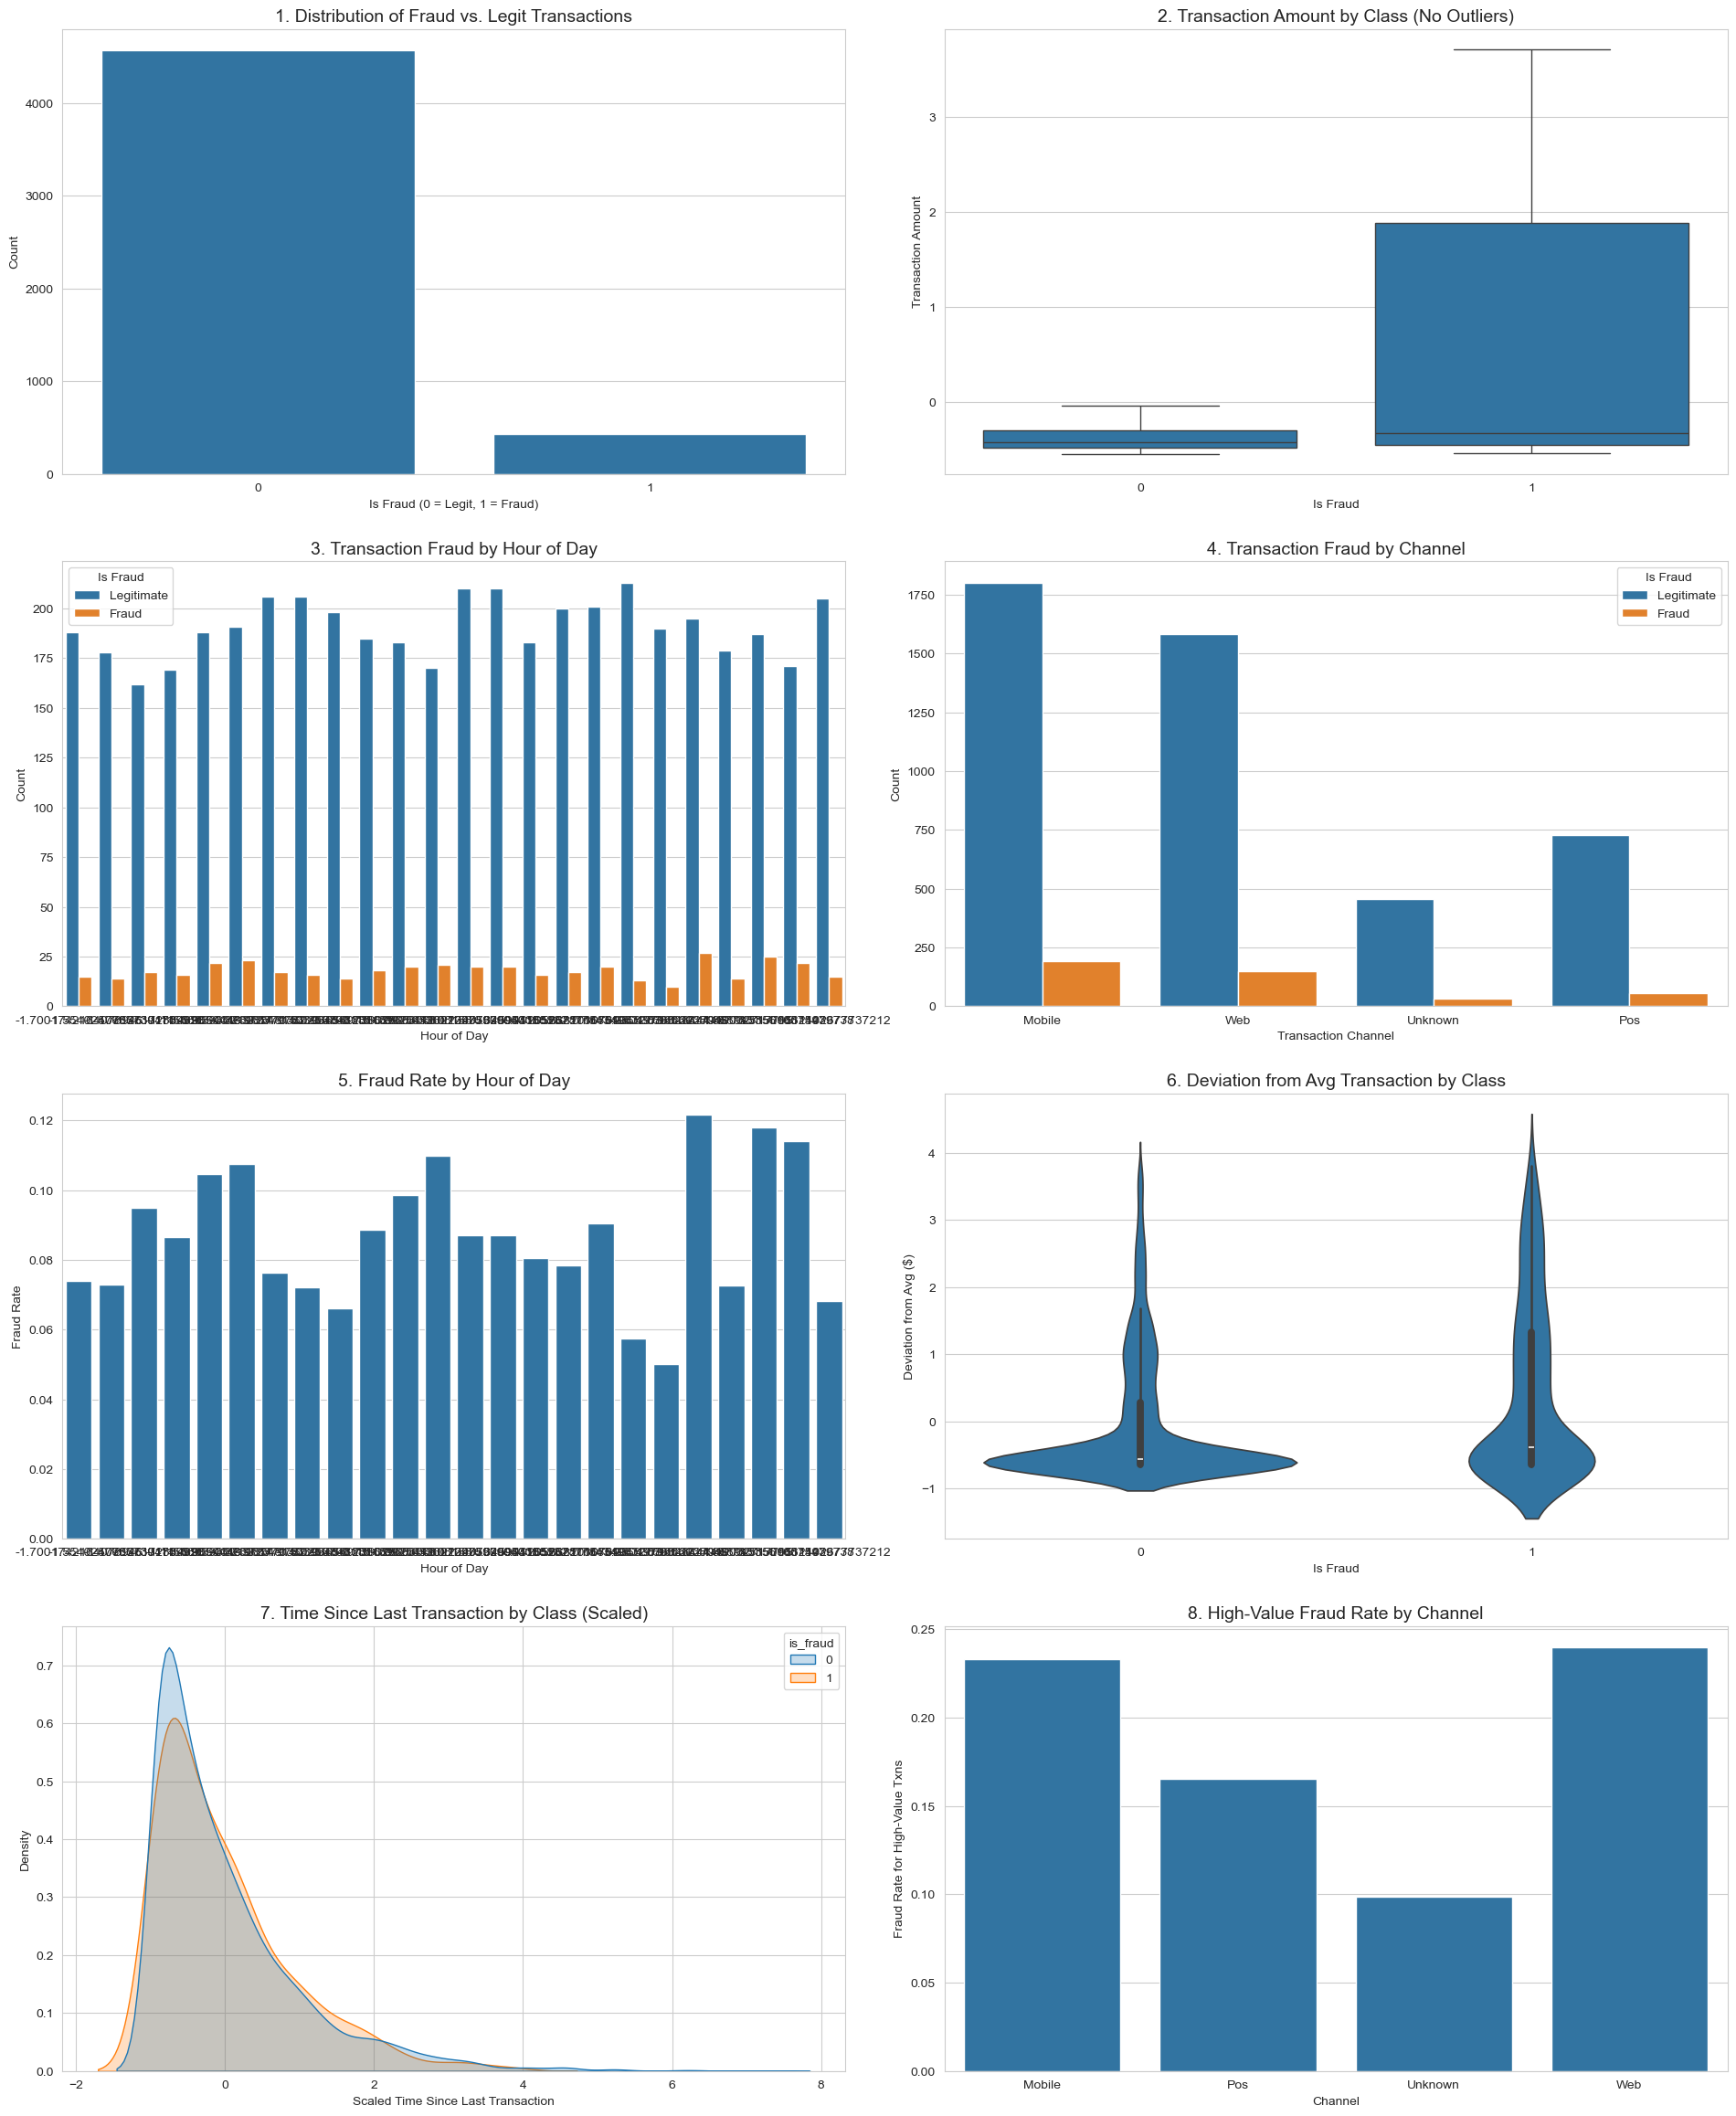

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 24))
plt.tight_layout(pad=5.0)

# Reconstruct 'channel' column from one-hot encoded columns for plotting
def reconstruct_channel(row):
    if row['channel_Mobile'] == 1:
        return 'Mobile'
    elif row['channel_Pos'] == 1:
        return 'Pos'
    elif row['channel_Web'] == 1:
        return 'Web'
    else:
        return 'Unknown'

df['channel_reconstructed'] = df.apply(reconstruct_channel, axis=1)

# --- Original Analysis ---
# 1. Distribution of Fraudulent vs. Legitimate Transactions
sns.countplot(x='is_fraud', data=df, ax=axes[0, 0])
axes[0, 0].set_title('1. Distribution of Fraud vs. Legit Transactions', fontsize=14)
axes[0, 0].set_xlabel('Is Fraud (0 = Legit, 1 = Fraud)')
axes[0, 0].set_ylabel('Count')

# 2. Transaction Amount by Class (without outliers)
sns.boxplot(x='is_fraud', y='transaction_amount', data=df, showfliers=False, ax=axes[0, 1])
axes[0, 1].set_title('2. Transaction Amount by Class (No Outliers)', fontsize=14)
axes[0, 1].set_xlabel('Is Fraud')
axes[0, 1].set_ylabel('Transaction Amount')

# 3. Fraud Transactions by Hour of Day
sns.countplot(x='hour', hue='is_fraud', data=df, ax=axes[1, 0])
axes[1, 0].set_title('3. Transaction Fraud by Hour of Day', fontsize=14)
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Is Fraud', labels=['Legitimate', 'Fraud'])

# 4. Fraud Transactions by Channel (using reconstructed channel)
sns.countplot(x='channel_reconstructed', hue='is_fraud', data=df, ax=axes[1, 1])
axes[1, 1].set_title('4. Transaction Fraud by Channel', fontsize=14)
axes[1, 1].set_xlabel('Transaction Channel')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Is Fraud', labels=['Legitimate', 'Fraud'])

# --- Advanced Analysis ---
# 5. Fraud Rate by Hour of Day
hourly_fraud_rate = df.groupby('hour')['is_fraud'].mean().reset_index()
sns.barplot(x='hour', y='is_fraud', data=hourly_fraud_rate, ax=axes[2, 0])
axes[2, 0].set_title('5. Fraud Rate by Hour of Day', fontsize=14)
axes[2, 0].set_xlabel('Hour of Day')
axes[2, 0].set_ylabel('Fraud Rate')

# 6. Deviation from Average Transaction Amount (Distribution)
sns.violinplot(x='is_fraud', y='txn_deviation_from_avg', data=df, ax=axes[2, 1])
axes[2, 1].set_title('6. Deviation from Avg Transaction by Class', fontsize=14)
axes[2, 1].set_xlabel('Is Fraud')
axes[2, 1].set_ylabel('Deviation from Avg ($)')

# 7. Time Since Last Transaction Distribution by Class
sns.kdeplot(data=df, x='time_since_last_txn', hue='is_fraud', fill=True, common_norm=False, ax=axes[3, 0])
axes[3, 0].set_title('7. Time Since Last Transaction by Class (Scaled)', fontsize=14)
axes[3, 0].set_xlabel('Scaled Time Since Last Transaction')
axes[3, 0].set_ylabel('Density')
# Remove or adapt set_xbound for scaled range:
# axes[3, 0].set_xbound(lower=df['time_since_last_txn'].min(), upper=df['time_since_last_txn'].max())


# 8. High-Value Fraud Rate by Channel (using reconstructed channel)
high_value_fraud_pivot = pd.pivot_table(df[df['is_high_value'] == 1], values='is_fraud',
                                        index='channel_reconstructed', aggfunc='mean').reset_index()
sns.barplot(x='channel_reconstructed', y='is_fraud', data=high_value_fraud_pivot, ax=axes[3, 1])
axes[3, 1].set_title('8. High-Value Fraud Rate by Channel', fontsize=14)
axes[3, 1].set_xlabel('Channel')
axes[3, 1].set_ylabel('Fraud Rate for High-Value Txns')

plt.show()


In [17]:
import os

# Create the 'data/processed' directory if it doesn't exist
os.makedirs('data/processed', exist_ok=True)

# Save the processed DataFrame to a new CSV file
# The index=False argument prevents pandas from writing the DataFrame index as a column
df.to_csv("data/processed/transactions_processed.csv", index=False)

print("Processed data saved successfully to data/processed/transactions_processed.csv")

Processed data saved successfully to data/processed/transactions_processed.csv


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Assume 'df' is your final processed DataFrame

# Define features (X) and target (y)
X = df.drop(columns=['transaction_id', 'customer_id', 'timestamp', 'is_fraud'])
y = df['is_fraud']

# --- Step 1: Split into training set and test set (80/20 split) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% for the final test set
    stratify=y,
    random_state=42
)

print("Initial split:")
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print("-" * 30)

# --- Step 2: Split the training set into a new training set and validation set (80/20 split) ---
# You can comment out this entire section if you don't need a validation set.
# This will result in your original X_train and y_train being your final training data.

# X_train_final, X_val, y_train_final, y_val = train_test_split(
#     X_train, y_train,
#     test_size=0.25,      # 25% of the initial 80% is 20% of the total dataset
#     stratify=y_train,
#     random_state=42
# )

# After this split, your data distribution will be approximately 60% Train, 20% Validation, 20% Test.

# print("Final split (with validation set):")
# print(f"Final training set size: {len(X_train_final)}")
# print(f"Validation set size: {len(X_val)}")
# print(f"Testing set size: {len(X_test)}")
# print("-" * 30)

# --- Save the datasets ---
# Create the 'data/processed' directory if it doesn't exist
os.makedirs('data/processed', exist_ok=True)

# Combine features and target back into DataFrames for easy saving
# train_df = pd.concat([X_train_final, y_train_final], axis=1)
# val_df = pd.concat([X_val, y_val]1, axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_df_final = pd.concat([X_train, y_train], axis=1)

train_df_final.to_csv("data/processed/train.csv", index=False)
# val_df.to_csv("data/processed/val.csv", index=False)
test_df.to_csv("data/processed/test.csv", index=False)

print("Datasets saved to data/processed/ directory.")

Initial split:
Training set size: 4000
Testing set size: 1000
------------------------------
Datasets saved to data/processed/ directory.
